In this project, we will use the KNN Model, one of the Machine Learning models, on the diabetes data set in Python.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Outcome = 1 Diabetes
# Outcome = 0 Healthy
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


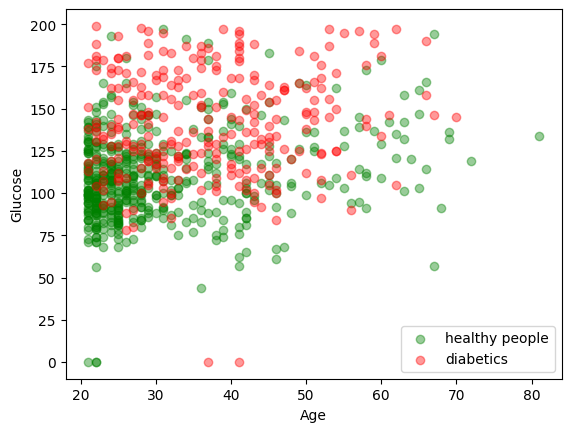

In [4]:
# extra review
diabetics = data[data.Outcome == 1]
healthy_people = data[data.Outcome == 0]


# For now, let's make an example drawing just by looking at gloucose:
# At the end of our program, our machine learning model will make a prediction by looking not only at glucose 
# but also at all other data.
plt.scatter(healthy_people.Age, healthy_people.Glucose, color="green", label="healthy people", alpha = 0.4)
plt.scatter(diabetics.Age, diabetics.Glucose, color="red", label="diabetics", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [5]:
# Let's determine the x and y axes
y = data.Outcome.values
x_raw_data = data.drop(["Outcome"],axis=1)   
# We remove the Outcome column (dependent variable) and leave only independent variables.
# Because the KNN algorithm will group within x values..


# We do normalization - we update all the values in x_raw_data so that they are only between 0 and 1
# If we do not normalize in this way, high numbers will crush small numbers and may mislead the KNN algorithm!
x = (x_raw_data - np.min(x_raw_data))/(np.max(x_raw_data)-np.min(x_raw_data))

# firstly
print("Raw data before normalization:\n")
print(x_raw_data.head())


# after 
print("\n\n\nThe data we will give to artificial intelligence for training after normalization:\n")
print(x.head())

Raw data before normalization:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



The data we will give to artificial intelligence for training after normalization:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2   

In [6]:
# We separate our train data and test data
# Our train data will be used to learn the system to distinguish between healthy people and sick people
# If our test data is, let's see if our machine learning model can accurately distinguish between sick and healthy people. 
# will be used to test...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)  #testing part is 10%, training part is 90%

# We create our knn model.
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)   #fitting, that is, we train the model
prediction = knn.predict(x_test)  # We make predictions based on testing.
print("Validation test result of our test data for K=3 ", knn.score(x_test, y_test))


Validation test result of our test data for K=3  0.8311688311688312


In [8]:
# What should k be?
# here the value to be optimized is k
# let's determine the best k value..
counter = 1
for k in range(1,11):
    new_knn = KNeighborsClassifier(n_neighbors = k)
    new_knn.fit(x_train,y_train)
    print(counter, "  ", "Accuracy Rate: %", new_knn.score(x_test,y_test)*100)
    counter += 1
    

1    Accuracy Rate: % 71.42857142857143
2    Accuracy Rate: % 71.42857142857143
3    Accuracy Rate: % 83.11688311688312
4    Accuracy Rate: % 80.51948051948052
5    Accuracy Rate: % 81.81818181818183
6    Accuracy Rate: % 83.11688311688312
7    Accuracy Rate: % 80.51948051948052
8    Accuracy Rate: % 80.51948051948052
9    Accuracy Rate: % 79.22077922077922
10    Accuracy Rate: % 79.22077922077922


In [10]:
# For a new patient forecast:
from sklearn.preprocessing import MinMaxScaler

# We are doing normalization - we used MinMax scaler to normalize faster...
sc = MinMaxScaler()
sc.fit_transform(x_raw_data)

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

1